## Introdução a Aprendizado de Máquina

### Professor Enerson Oliveira

### João Manoel Lins - 1924520-X
### joaomanoellins@gmail.com

O objetivo é encontrar um modelo, que de acordo com as médias do desempenho dos jogadores em quadra, idade, altura, peso e entre outros, consiga prever seu salário.

<p style='text-align: center'>Em memória de Kobe Bryant</p>

![Kobe Bryant](misc/kb24.jpeg)

<p style='text-align: center'>#KB24</p>

In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
sns.set()

%matplotlib inline

In [2]:
dataset_path = os.path.join('.', 'datasets', 'NBA_Players.csv')

# Carregando o dataset

In [3]:
nba = pd.read_csv(dataset_path)

# Analisando os dados

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 30 columns):
TEAM                550 non-null object
 NAME               550 non-null object
 EXPERIENCE         550 non-null int64
 URL                550 non-null object
 POSITION           550 non-null object
 AGE                550 non-null object
 HT                 550 non-null float64
 WT                 550 non-null float64
 COLLEGE            550 non-null object
 SALARY             550 non-null object
 PPG_LAST_SEASON    538 non-null float64
 APG_LAST_SEASON    538 non-null float64
 RPG_LAST_SEASON    538 non-null float64
 PER_LAST_SEASON    538 non-null float64
 PPG_CAREER         550 non-null float64
 APG_CAREER         550 non-null float64
 RGP_CAREER         550 non-null float64
 GP                 550 non-null int64
 MPG                550 non-null float64
 FGM_FGA            550 non-null object
 FGP                550 non-null float64
 THM_THA            550 non-null object
 THP  

Atributos que possuem valores faltantes:
<ul>
    <li>PPG_LAST_SEASON</li>
    <li>APG_LAST_SEASON</li>
    <li>RPG_LAST_SEASON</li>
    <li>RGP_CAREER</li>
</ul>

<h4>Legenda: </h4>
<ul>
    <li>PPG_LAST_SEASON - Points Per Game - Last Season</li>
    <li>APG_LAST_SEASON - Assists Per Game - Last Season</li>
    <li>RPG_LAST_SEASON - Rebounds Per Game - Last Season</li>
    <li>PER_LAST_SEASON - Player Efficiency Rating is the overall rating of a player's per-minute statistical production. The league average is 15.00 every season.</li>
    <li>PPG_CARRER - Points Per Game - Carrer</li>
    <li>APG_CARRER - Assists Per Game - Carrer</li>
    <li>RPG_CARRER - Rebounds Per Game - Carrer</li>
    <li>GP - Games Played</li>
    <li>MPG - Minutes Per Game</li>
    <li>FGM_FGA - Field Goals Made-Attempted Per Game</li>
    <li>FGP - Field Goal Percentage</li>
    <li>THM_THA - ???</li>
    <li>THP - ???</li>
    <li>FTM_FTA - Free Throws Made-Attempted Per Game</li>
    <li>FTP - Free Throws Percentage</li>
    <li>APG - Assists Per Game</li>
    <li>BLKPG - Blocks Per Game</li>
    <li>STLPG - Steals Per Game</li>
    <li>TOPG - Turnover Per Game</li>
    <li>PPG - Points Per Game</li>
</ul>

In [5]:
nba.describe()

,EXPERIENCE,HT,WT,PPG_LAST_SEASON,APG_LAST_SEASON,RPG_LAST_SEASON,PER_LAST_SEASON,PPG_CAREER,APG_CAREER,RGP_CAREER,GP,MPG,FGP,THP,FTP,APG,BLKPG,STLPG,TOPG,PPG
count,550.000000,550.000000,550.000000,538.000000,538.000000,538.000000,538.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,4.018182,200.512218,98.371255,7.316171,2.667472,1.727881,10.870725,6.944545,2.622182,1.708182,249.561818,16.548000,0.350011,0.230956,0.560867,1.493455,0.336909,0.541091,0.943273,6.944545
std,4.144876,8.592139,10.883866,6.625138,2.809521,1.861049,9.382982,5.912676,2.665679,1.732489,285.841975,11.496338,0.202934,0.171717,0.331210,1.658239,0.409453,0.454148,0.823085,5.912676
min,0.000000,175.260000,76.920000,0.000000,0.000000,0.000000,-28.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,193.675000,90.500000,1.000000,0.200000,0.000000,3.745000,1.500000,0.300000,0.125000,6.000000,4.725000,0.327750,0.000000,0.423000,0.125000,0.000000,0.100000,0.200000,1.500000
50%,3.000000,200.660000,97.290000,6.150000,1.900000,1.100000,12.105000,6.400000,1.800000,1.200000,141.500000,18.250000,0.430500,0.310000,0.723000,1.100000,0.200000,0.500000,0.900000,6.400000
75%,6.000000,208.280000,106.330000,11.700000,4.200000,2.875000,15.877500,10.500000,4.100000,2.800000,409.500000,26.100000,0.469000,0.358750,0.796500,2.100000,0.500000,0.800000,1.400000,10.500000
max,20.000000,220.980000,131.220000,30.400000,16.000000,12.300000,133.950000,27.200000,13.400000,11.700000,1471.000000,38.800000,1.000000,1.000000,1.000000,9.800000,2.400000,2.300000,4.000000,27.200000


In [6]:
nba.head(5)

,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,PPG_LAST_SEASON,APG_LAST_SEASON,RPG_LAST_SEASON,PER_LAST_SEASON,PPG_CAREER,APG_CAREER,RGP_CAREER,GP,MPG,FGM_FGA,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
0,Boston Celtics,Aron Baynes,6,http://www.espn.com/nba/player/_/id/2968439,SF,31,208.28,117.65,Washington State,"5,193,600",6.0,1.1,5.4,12.09,5.4,0.7,4.4,376,15.0,2.2-4.3,0.502,0.0-0.1,0.143,1.0-1.3,0.802,0.7,0.5,0.2,0.8,5.4
1,Boston Celtics,Justin Bibbs,0,http://www.espn.com/nba/player/_/id/3147500,G,22,195.58,99.55,Virginia Tech,Not signed,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0.0,0,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
2,Boston Celtics,Jabari Bird,1,http://www.espn.com/nba/player/_/id/3064308,SG,24,198.12,89.59,California,"1,349,464",3.0,0.6,1.5,12.18,3.0,0.6,1.5,13,8.8,1.2-2.0,0.577,0.2-0.5,0.429,0.5-1.0,0.462,0.6,0.1,0.2,0.6,3.0
3,Boston Celtics,Jaylen Brown,2,http://www.espn.com/nba/player/_/id/3917376,F,21,200.66,99.55,California,"5,169,960",14.5,1.6,4.9,13.69,10.4,1.2,3.8,148,23.6,3.8-8.3,0.461,1.1-3.0,0.379,1.6-2.4,0.658,1.2,0.3,0.7,1.3,10.4
4,Boston Celtics,PJ Dozier,1,http://www.espn.com/nba/player/_/id/3923250,PG,21,198.12,92.76,South Carolina,Not signed,1.0,0.0,0.5,-4.82,1.0,0.0,0.5,2,1.5,0.5-1.0,0.500,0.0-0.0,0.000,0.0-0.0,0.000,0.0,0.0,0.0,0.5,1.0


In [7]:
[col for col in nba.columns.array]

['TEAM',
 ' NAME',
 ' EXPERIENCE',
 ' URL',
 ' POSITION',
 ' AGE',
 ' HT',
 ' WT',
 ' COLLEGE',
 ' SALARY',
 ' PPG_LAST_SEASON',
 ' APG_LAST_SEASON',
 ' RPG_LAST_SEASON',
 ' PER_LAST_SEASON',
 ' PPG_CAREER',
 ' APG_CAREER',
 ' RGP_CAREER',
 ' GP',
 ' MPG',
 ' FGM_FGA',
 ' FGP',
 ' THM_THA',
 ' THP',
 ' FTM_FTA',
 ' FTP',
 ' APG',
 ' BLKPG',
 ' STLPG',
 ' TOPG',
 ' PPG']

As colunas possuem um problema. Há um espaço antes de cada nome.

In [8]:
# Corrigindo. Tirando os espaços no nome das colunas
# Aproveitei para colocar as colunas em minúsculo
nba.columns = [c.strip().lower() for c in nba.columns]

[col for col in nba.columns.array]

['team',
 'name',
 'experience',
 'url',
 'position',
 'age',
 'ht',
 'wt',
 'college',
 'salary',
 'ppg_last_season',
 'apg_last_season',
 'rpg_last_season',
 'per_last_season',
 'ppg_career',
 'apg_career',
 'rgp_career',
 'gp',
 'mpg',
 'fgm_fga',
 'fgp',
 'thm_tha',
 'thp',
 'ftm_fta',
 'ftp',
 'apg',
 'blkpg',
 'stlpg',
 'topg',
 'ppg']

## Correções nas colunas

In [9]:
def is_teams_ok():
    # Há 30 times na NBA
    assert len(nba['team'].value_counts().index) == 30

def is_position_ok():
    pos_len = len(nba['position'].value_counts().index)
    
    # Geralmente se usa no basquete 5 posições.
    # Mas pode ter até 7 se considerarmos as posições G e F
    # G é um armador, mas não considerado um PG ou SG
    # F é um ala, mas não considerado um SF ou PF 
    assert pos_len >= 5 and pos_len <= 7

# Remover jogadores que não tiveram salário e nem jogaram uma partida
def remove_players_no_games_salary(df):
    idxs = df[(df['gp'] == 0) & (df['salary'] == 0)].index
    df.drop(idxs, axis=0, inplace=True)

# Se tiver erro vai parar o algoritmo
# Precisa de uma intervenção manual
is_teams_ok()

# Se tiver erro vai parar o algoritmo
# Precisa de uma intervenção manual
is_position_ok()

# "age" -> tem um bug do -
# Vamos trocar - por 0
nba['age'] = nba['age'].str.replace('-', '0').astype(int)

# "college" -> quem tiver "-" é porque pode ser estrangeiro,
# veio direto do ensino médio (LeBron James), não chegou a cursar faculdade
# ou por falta informação na coleta
nba['college'] = nba['college'].str.replace('-', 'ND')

# Temos 2 problemas:
# 1) Not Signed não é um float
# 2) Salário com ","
nba['salary'] = nba['salary'].str.replace('Not signed', '0')
nba['salary'] = nba['salary'].str.replace(',', '').astype(float)
nba['salary'] = nba['salary'] / 1000000 # Colocar em milhões

print(f'Quantidade de jogadores antes da limpeza: {nba.shape[0]}')
remove_players_no_games_salary(nba)

# Vamos filtrar os jogadores das posições G e F. Pois são poucos
nba = nba.loc[(nba['position'] != 'G') & (nba['position'] != 'F')]
nba_bkp = nba.copy()

print(f'Quantidade de jogadores depois da limpeza: {nba.shape[0]}')

Quantidade de jogadores antes da limpeza: 550
Quantidade de jogadores depois da limpeza: 473


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110d0d750>,
      dtype=object)

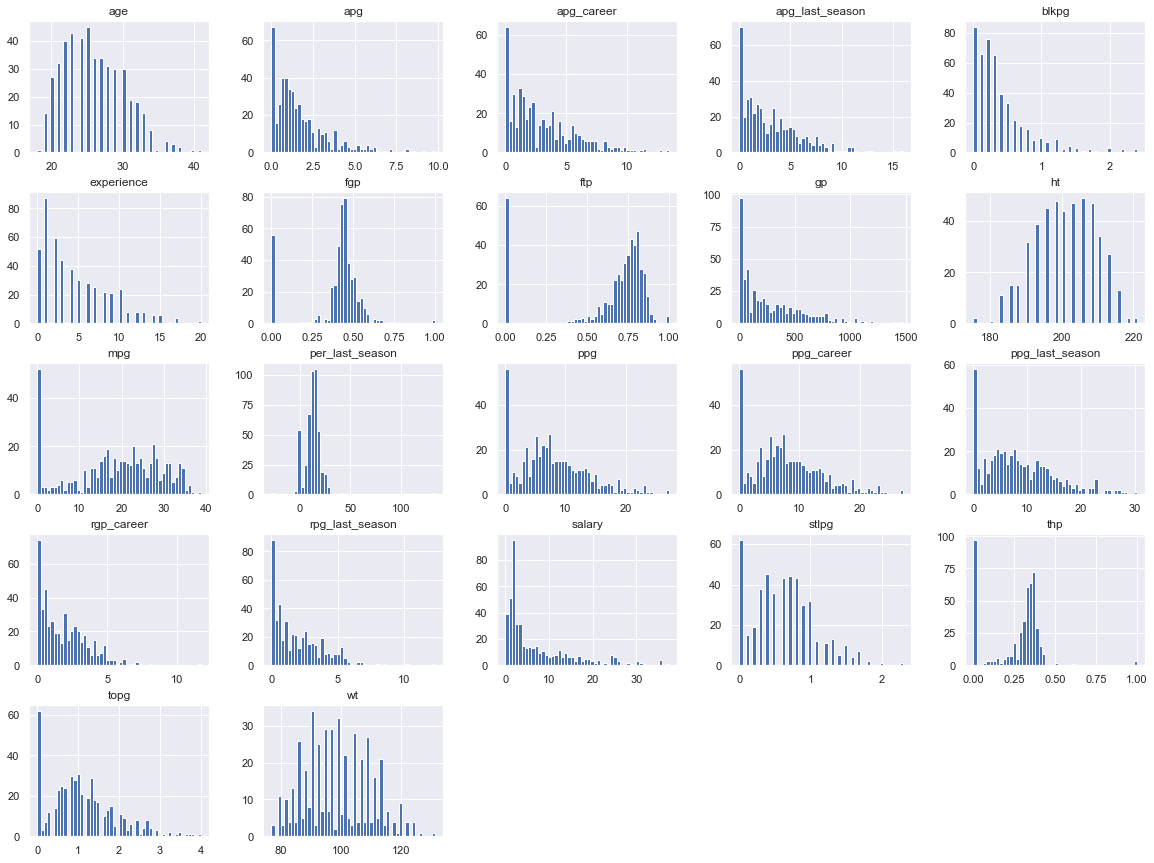

In [10]:
nba.hist(bins=50, figsize=(20,15))

Podemos notar que há um grupo considerável de jogadores com <b>0 de média em vários atributos</b>.

# Criar um conjunto de teste

Esse conjuto vai ser separado e não seria mexido.
Vamos separar os jogadores em grupos de acordo com a sua quantidade de temporadas na liga.

Separamos em 4 categorias:
<ul>
    <li>0 a 5 anos de exp</li>
    <li>6 a 10 anos de exp</li>
    <li>11 a 15 anos de exp</li>
    <li>16 ou mais anos de exp</li>
</ul>

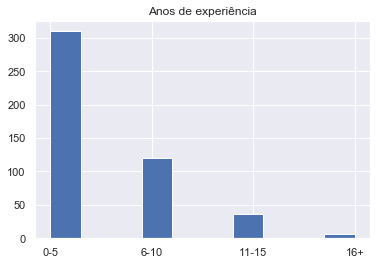

In [11]:
nba['exp_cat'] = pd.cut(nba['experience'] / 5, 
                        bins=[-np.inf, 1, 2, 3, np.Inf], 
                        labels=['0-5', '6-10', '11-15', '16+'])

plt.title('Anos de experiência')
nba['exp_cat'].sort_values().hist()

# Visualizar e ganhar insights

## Visualizar gráficos

In [12]:
def top_college_chart(df, total=15): 
    order = df['college'].value_counts(ascending=False).iloc[:total].index.tolist()
    fig, _ = plt.subplots(figsize=((10, 5)))
    
    g = sns.countplot('college', data=df, order=order)
    g.set_xlabel('Universidade')
    g.set_ylabel('Quantidade')
    
    for p in g.patches:
        points = p.get_bbox().get_points()
        x = sum(points[:, 0]) / 2
        y = points[1,1]
        label = '{:.1f}%'.format((y / len(df)) * 100)

        g.annotate(label, (x, y), ha='center', va='bottom')

    g.set_title(f'Top {total} Universidades')
    fig.autofmt_xdate(rotation=45)

In [13]:
def exp_pie_chart(df):
    labels = [c + ' anos' for c in df['exp_cat'].cat.categories.tolist()]
    values = df['exp_cat'].value_counts().tolist()
    explode = (0, 0, 0.1, 0.2)

    fig, ax = plt.subplots(figsize=(5, 5))
    _,_, autotexts = ax.pie(values, labels=labels,
           autopct='%1.1f%%', startangle=90,
            explode=explode,
           labeldistance=1.05, pctdistance=.55)
    ax.axis('equal')
    
    plt.title('Divisão por Quantidade de Temporadas')
    
    for autotext in autotexts:
        autotext.set_color('white')

In [14]:
def pos_pie_chart(df):
    counts = df['position'].value_counts()
    labels = counts.keys().tolist()
    values = counts.tolist()

    fig, ax = plt.subplots(figsize=(6, 6))
    _,_,autotexts = ax.pie(values, labels=labels,
           autopct='%1.1f%%', startangle=0,
           labeldistance=1.05, pctdistance=.75)
    
    plt.title('Divisão por Posição')
    
    for autotext in autotexts:
        autotext.set_color('white')

In [15]:
def salary_sum_chart(df):
    team_salary = df.groupby('team')['salary'].sum().sort_values(ascending=False)
    labels = team_salary.index.tolist()
    values = team_salary.values
    salary_mean = np.mean(values)
    colors = ['#4C9900' if v > salary_mean else '#CC0000' for v in values]

    fig, _ = plt.subplots(figsize=(20, 8))
    ax = sns.barplot(x=labels, y=values, palette=colors)
    
    ax.set_title('Salário Total por Time', size=20)
    ax.set_xlabel('Time', size=14)
    ax.set_ylabel('Salário (Milhões)', size=14)
    
    ax.axhline(salary_mean, color='blue', linewidth=.8, label='Média de Salário por Ano')
    ax.legend()
    
    for p in ax.patches:
        points = p.get_bbox().get_points()
        x = sum(points[:, 0]) / 2
        y = points[1, 1]
        label = '${:.1f} M'.format(y)
        
        ax.annotate(label, (x, y), ha='center', va='bottom')
    
    fig.autofmt_xdate(rotation=45)

In [16]:
def stats_grouped_by_position_chart(df, attr, attr_name, kind, kind_name):
    g = sns.relplot(attr, y=kind, 
                col='position', col_wrap=3,
                hue='exp_cat', size='exp_cat',
                legend='full',
                data=df)
 
    plt.subplots_adjust(top=0.90)
    
    g.fig.suptitle(f'Média de {attr_name} por {kind_name} - Agrupado por Posição', size=22)
    g.set_axis_labels(attr_name, kind_name)

In [17]:
def highest_salary_per_position_by_team_heatmap(df):    
    # ids dos jogadores com maior salario por posição por time
    nba_hghst_salary = df.groupby(['team', 'position'])['salary'].idxmax().tolist()
    data = df.loc[nba_hghst_salary]
    nba_salary_table = pd.pivot_table(data, values='salary', index='team', columns=['position'])

    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_title('Maior Salário por Posição por Time (Milhão)')
    
    sns.heatmap(nba_salary_table, cmap="seismic", linewidth=.7,
                robust=True, annot=True, annot_kws={'size': 13})

    ax.set_xlabel('Posição')
    ax.set_ylabel('Time')

In [18]:
def mean_salary_per_position_by_team_heatmap(df):
    nba_mean_table = pd.pivot_table(df, values='salary', 
                                    index='team', columns=['position'],
                                    aggfunc=np.mean)

    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_title('Média de Salário por Posição Por Time (Milhão)')
    
    sns.heatmap(nba_mean_table, cmap="seismic", linewidth=.7,
                robust=True, annot=True, annot_kws={'size': 13})

    ax.set_xlabel('Posição')
    ax.set_ylabel('Time')

In [19]:
def top20_salaries(df):
    idx = df['salary'].sort_values(ascending=False)[:20].index
    return nba.loc[idx, ['team', 'name', 'salary', 'position', 'age', 'mpg', 'ppg', 'apg', 'stlpg', 'topg']]

Vamos visualizar:
<ul>
    <li>Média de pontos e minutos por jogo</li>
    <li>Média de assistências e minutos por jogo</li>
    <li>Média de tocos e minutos por jogo</li>
    <li>Média de roubadas e minutos por jogo</li>
    <li>Média de turnover e minutos por jogo</li>
    <li>Média de lance-livre e minutos por jogo</li>
    <li>Média de field-goal e minutos por jogo</li>
</ul>

A ideia é procurar por "padrões". Saber se as variáveis possuem uma aumenta linear entre eles. Se a medida que o jogador ficar mais tempo em quadra, ele faz mais pontos, pega mais rebotes, dá mais assistências e etc. 

Será analisado se a altura ou o peso influência na quantidade de pontos.

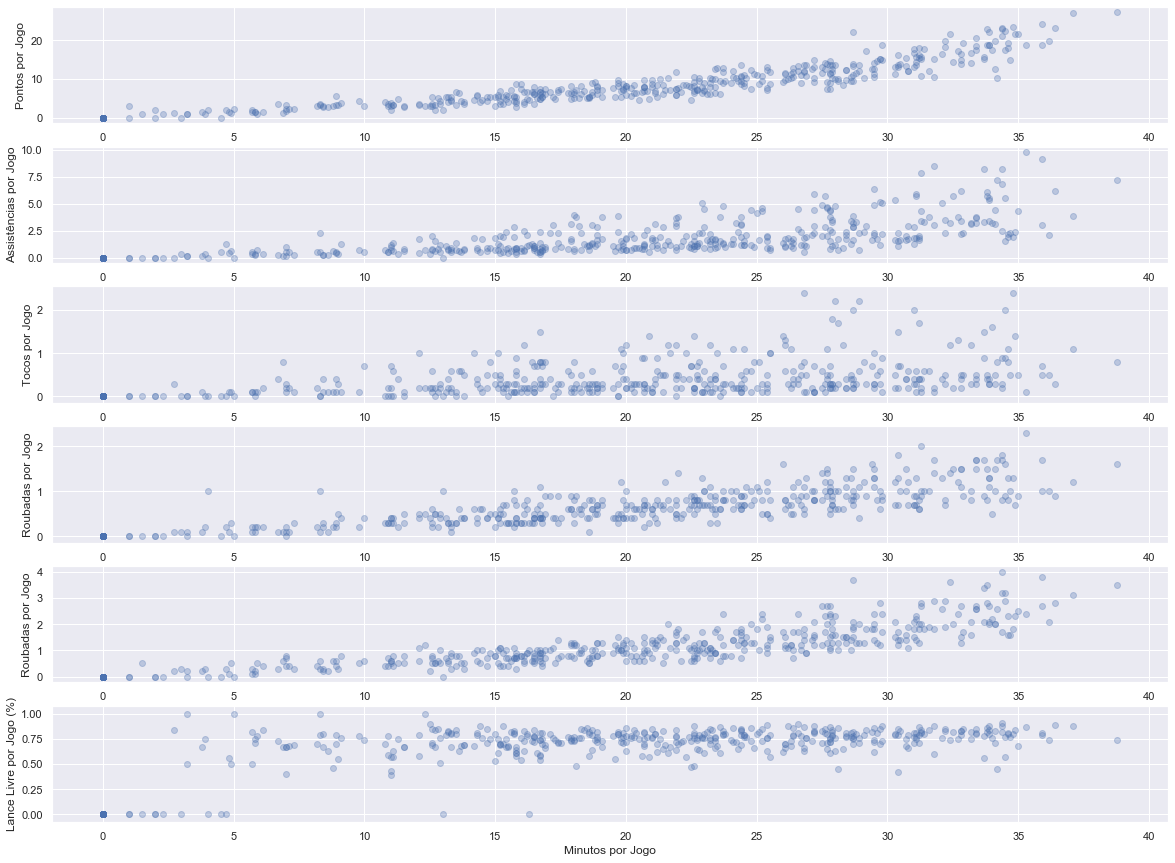

In [20]:
# Analise de minutos em relação aos stats
keys = ['ppg', 'apg', 'blkpg', 'stlpg', 'topg', 'ftp', 'fgp']
labels = [
    'Pontos por Jogo',
    'Assistências por Jogo',
    'Tocos por Jogo',
    'Roubadas por Jogo',
    'Roubadas por Jogo',
    'Lance Livre por Jogo (%)',
    'Field-Goal por Jogo (%)',
]

fig, axs = plt.subplots(6, figsize=(20,15))
fig.set_colorbar = True

for idx, ax in enumerate(axs):
    key = keys[idx]
    label = labels[idx]
    
    ax.set_xlabel('Minutos por Jogo')
    ax.set_ylabel(label)
    
    ax.scatter(nba['mpg'], nba[key], alpha=0.3)

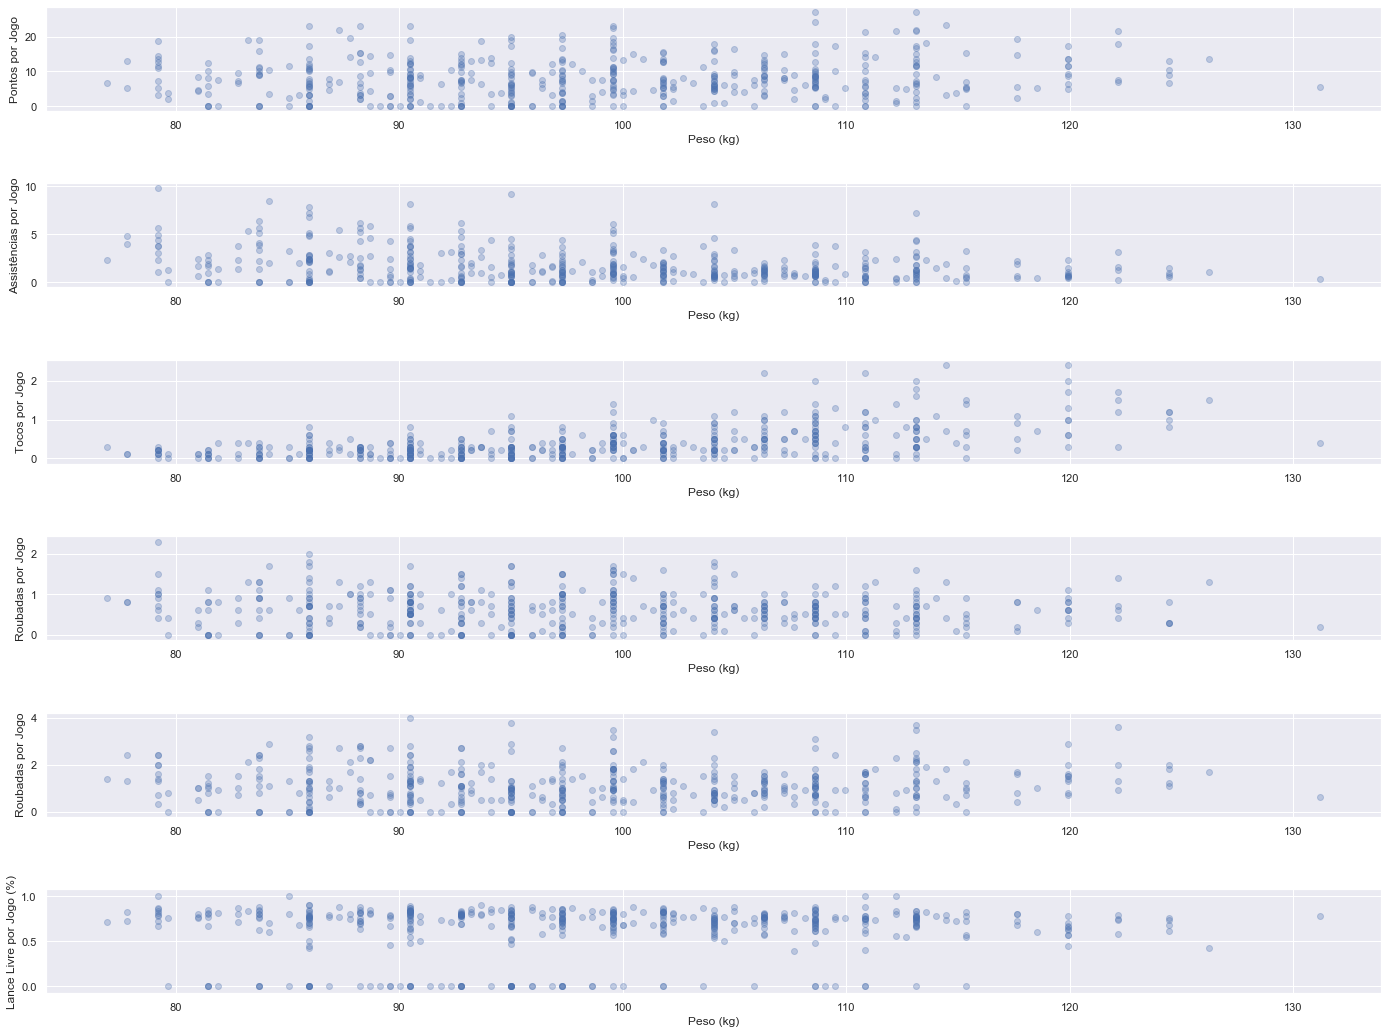

In [21]:
# Analise de peso em relação aos stats
keys = ['ppg', 'apg', 'blkpg', 'stlpg', 'topg', 'ftp', 'fgp']
labels = [
    'Pontos por Jogo',
    'Assistências por Jogo',
    'Tocos por Jogo',
    'Roubadas por Jogo',
    'Roubadas por Jogo',
    'Lance Livre por Jogo (%)',
    'Field-Goal por Jogo (%)',
]

fig, axs = plt.subplots(6, figsize=(20,15))

for idx, ax in enumerate(axs):
    key = keys[idx]
    label = labels[idx]
    
    ax.set_xlabel('Peso (kg)')
    ax.set_ylabel(label)
    
    ax.scatter(nba['wt'], nba[key], alpha=0.3)

fig.tight_layout(pad=3.0)

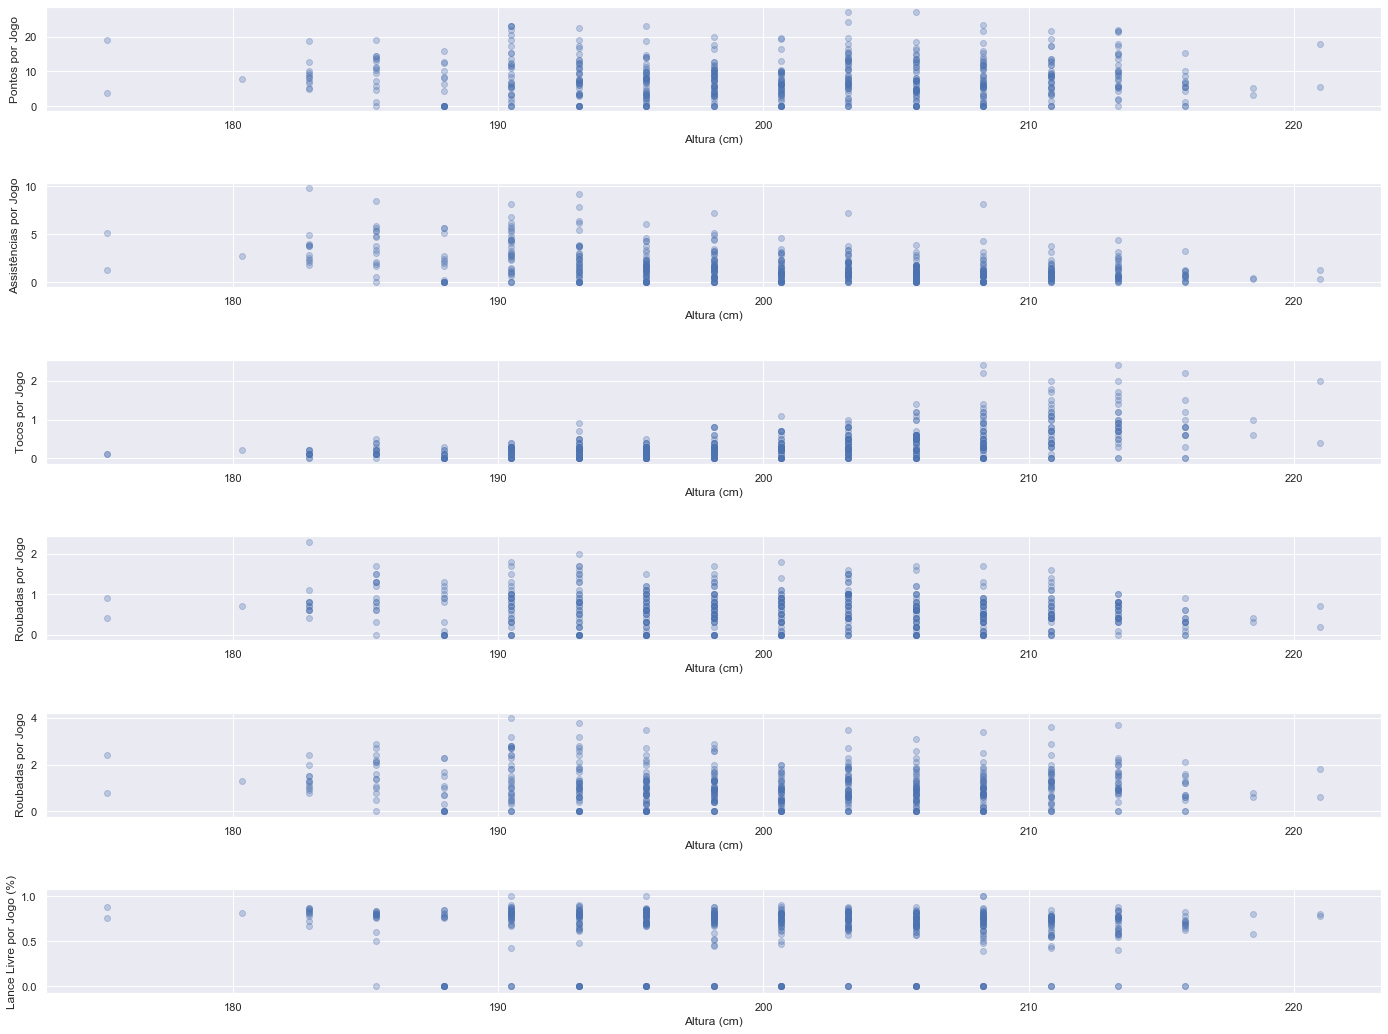

In [22]:
# Analise de altura em relação aos stats
keys = ['ppg', 'apg', 'blkpg', 'stlpg', 'topg', 'ftp', 'fgp']
labels = [
    'Pontos por Jogo',
    'Assistências por Jogo',
    'Tocos por Jogo',
    'Roubadas por Jogo',
    'Roubadas por Jogo',
    'Lance Livre por Jogo (%)',
    'Field-Goal por Jogo (%)',
]

fig, axs = plt.subplots(6, figsize=(20,15))

for idx, ax in enumerate(axs):
    key = keys[idx]
    label = labels[idx]
    
    ax.set_xlabel('Altura (cm)')
    ax.set_ylabel(label)
    
    ax.scatter(nba['ht'], nba[key], alpha=0.3)

fig.tight_layout(pad=3.0)

Nem a altura, nem o peso possuem uma relação linear por estatísticas por jogo.

### Alguns gráficos para ilustrações dos dados

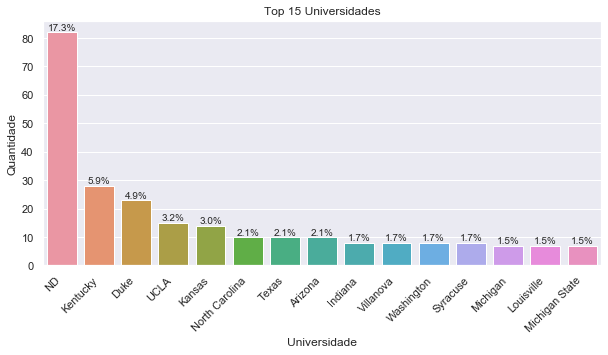

In [23]:
top_college_chart(nba)

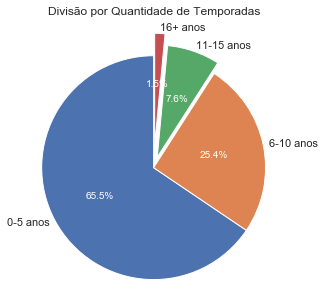

In [24]:
exp_pie_chart(nba)

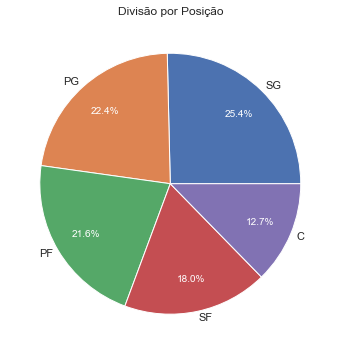

In [25]:
pos_pie_chart(nba)

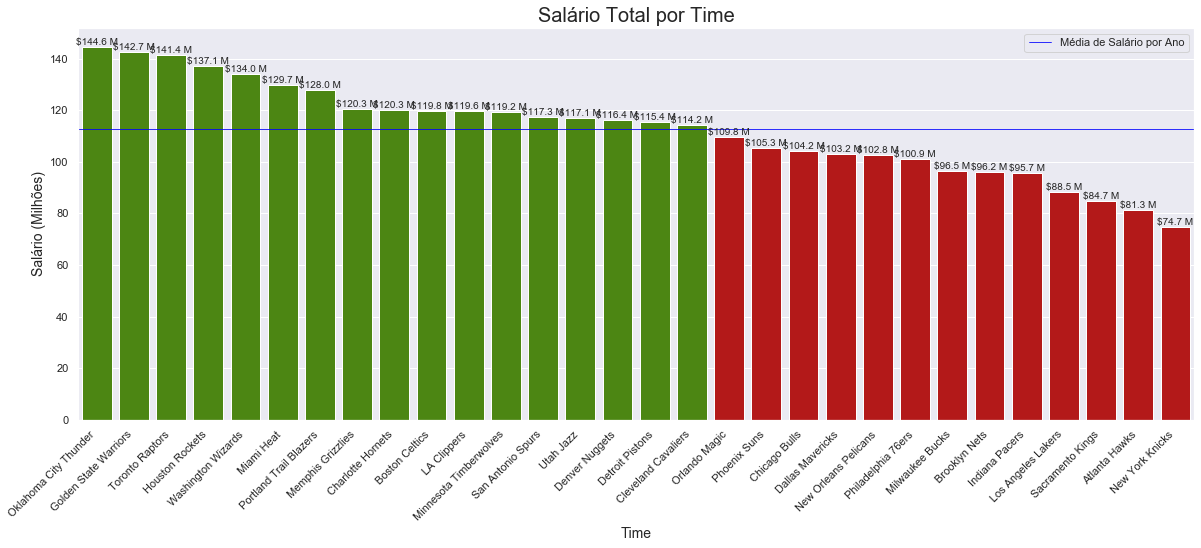

In [26]:
salary_sum_chart(nba)

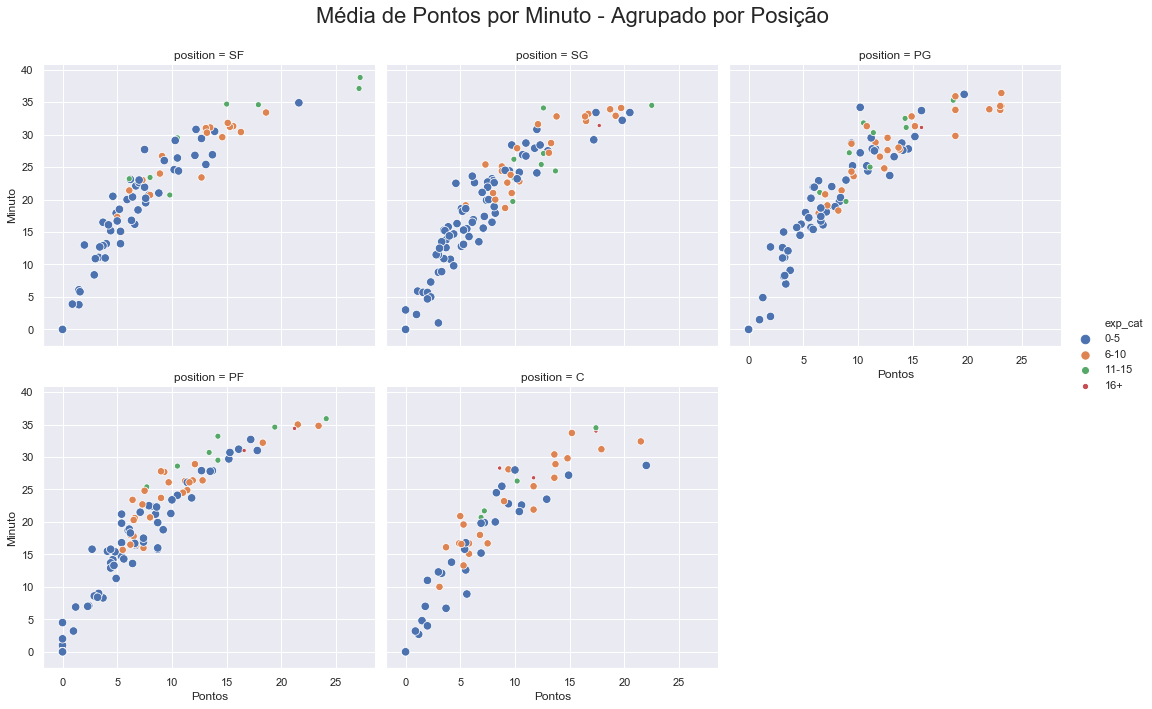

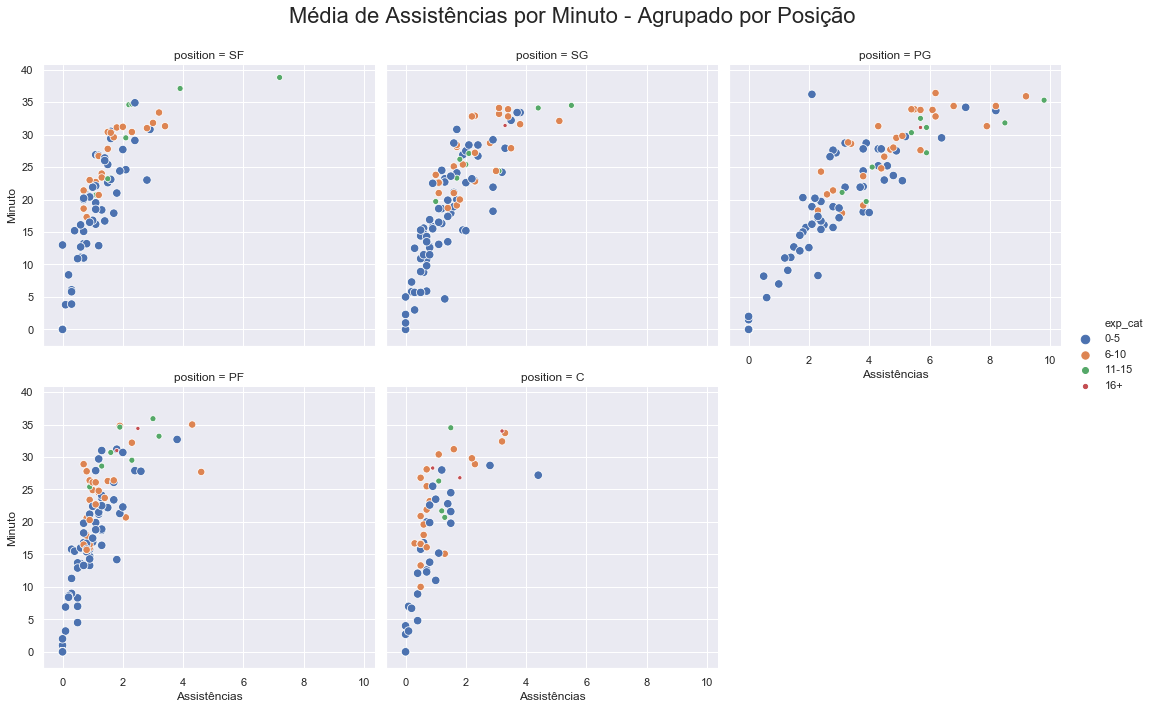

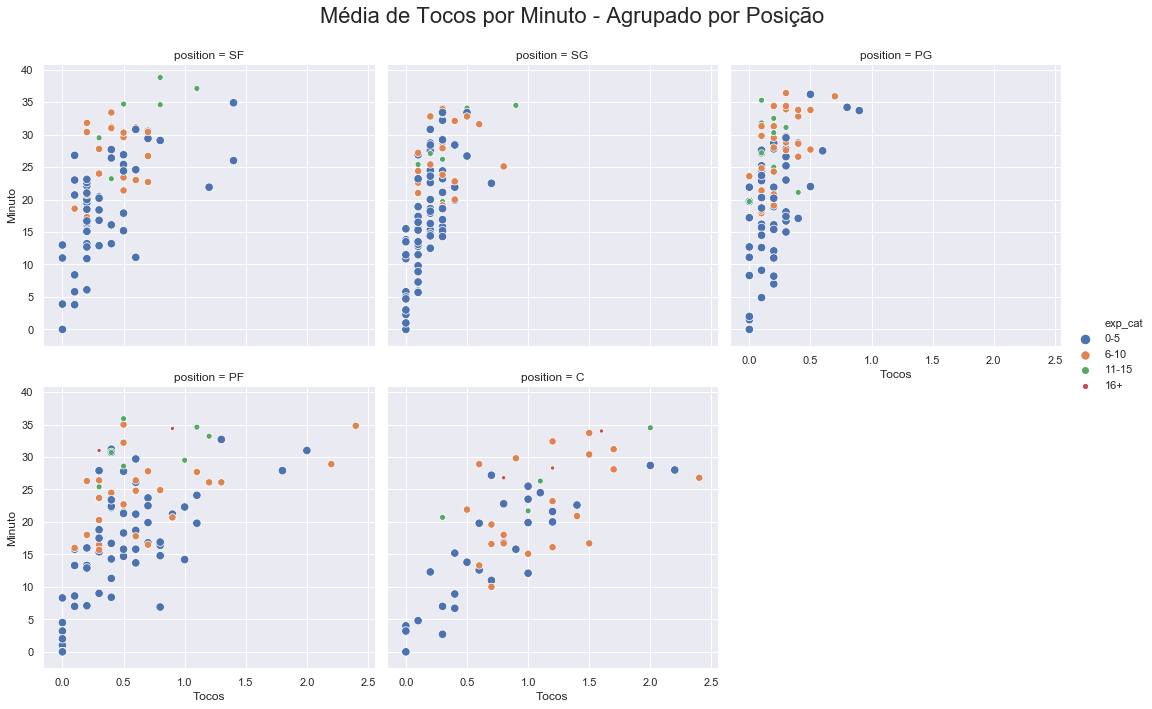

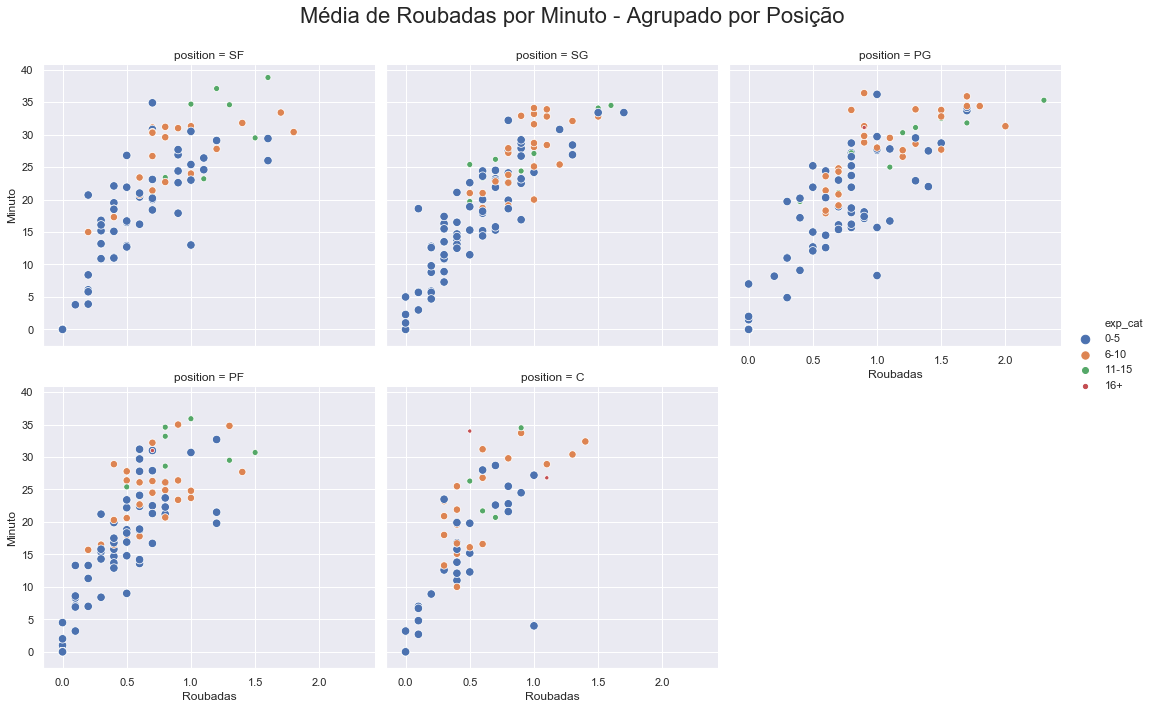

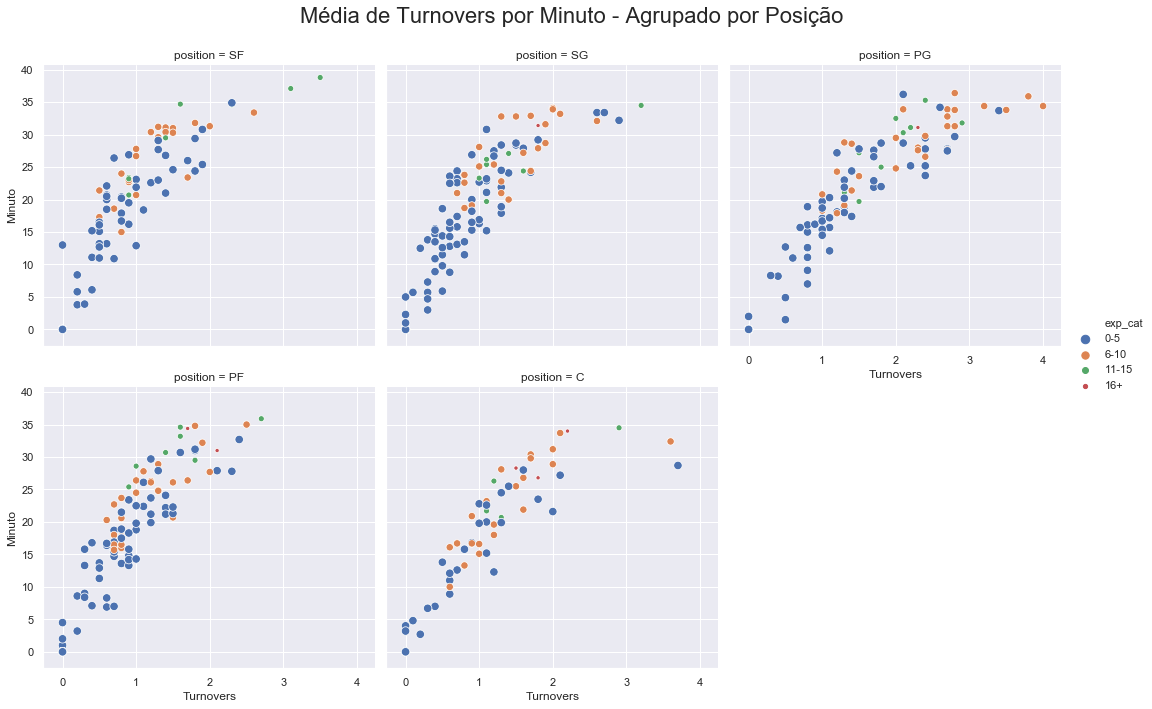

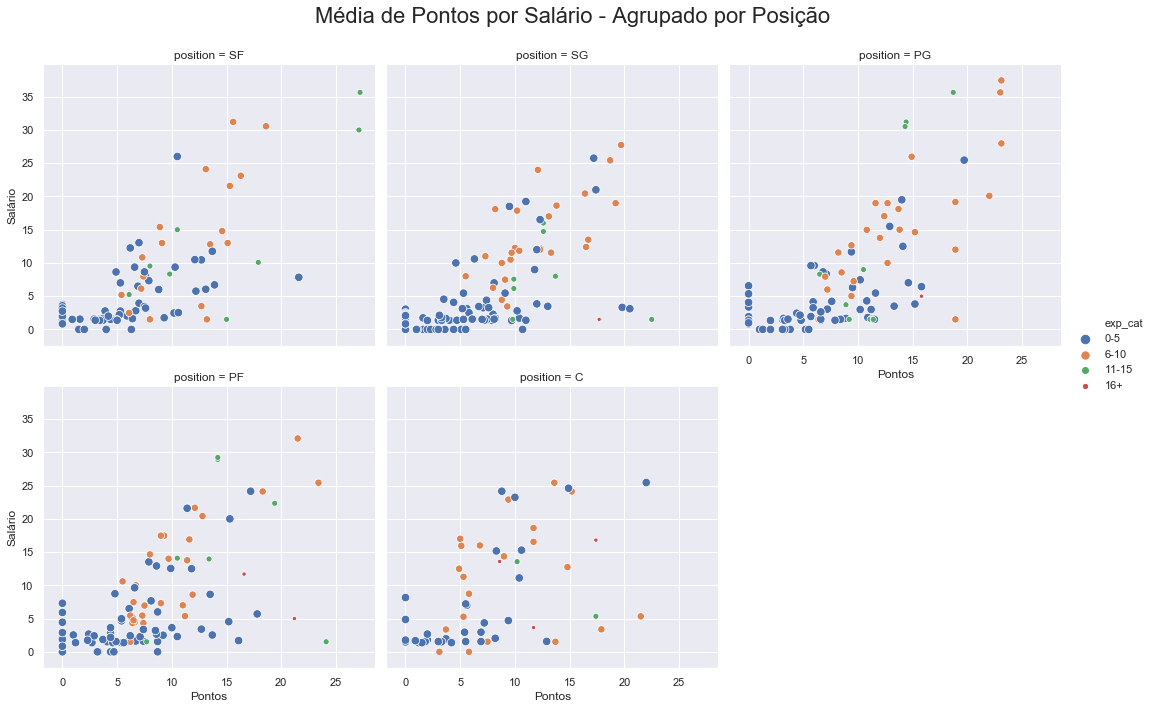

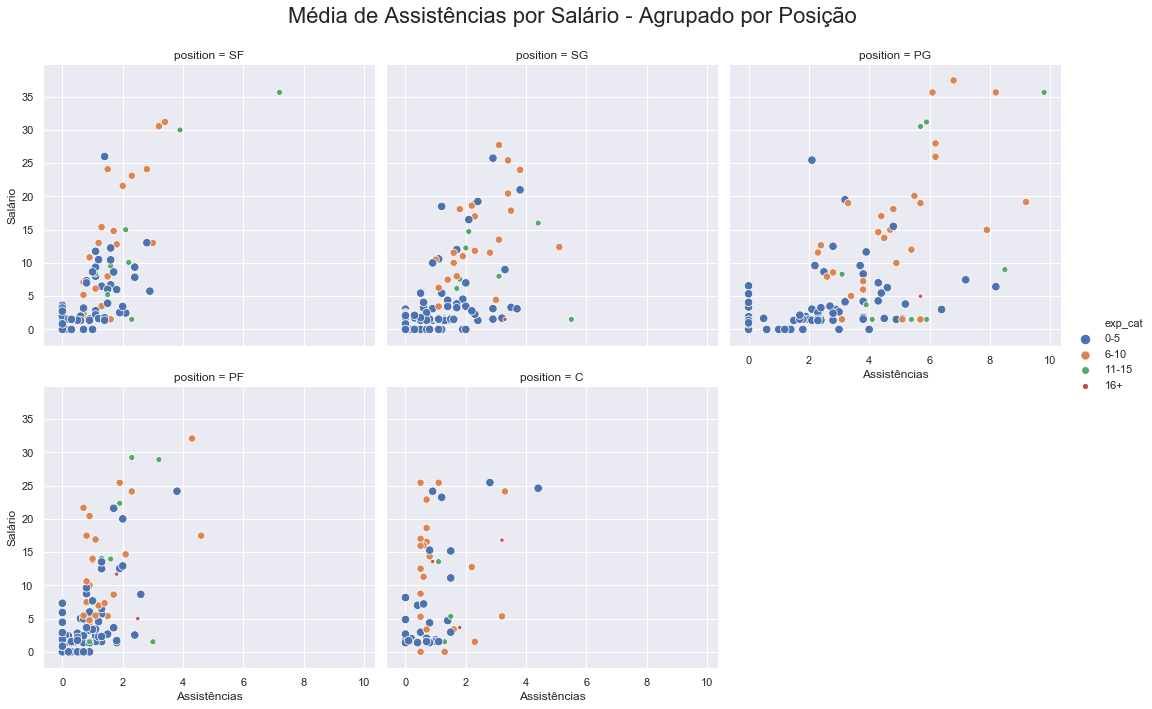

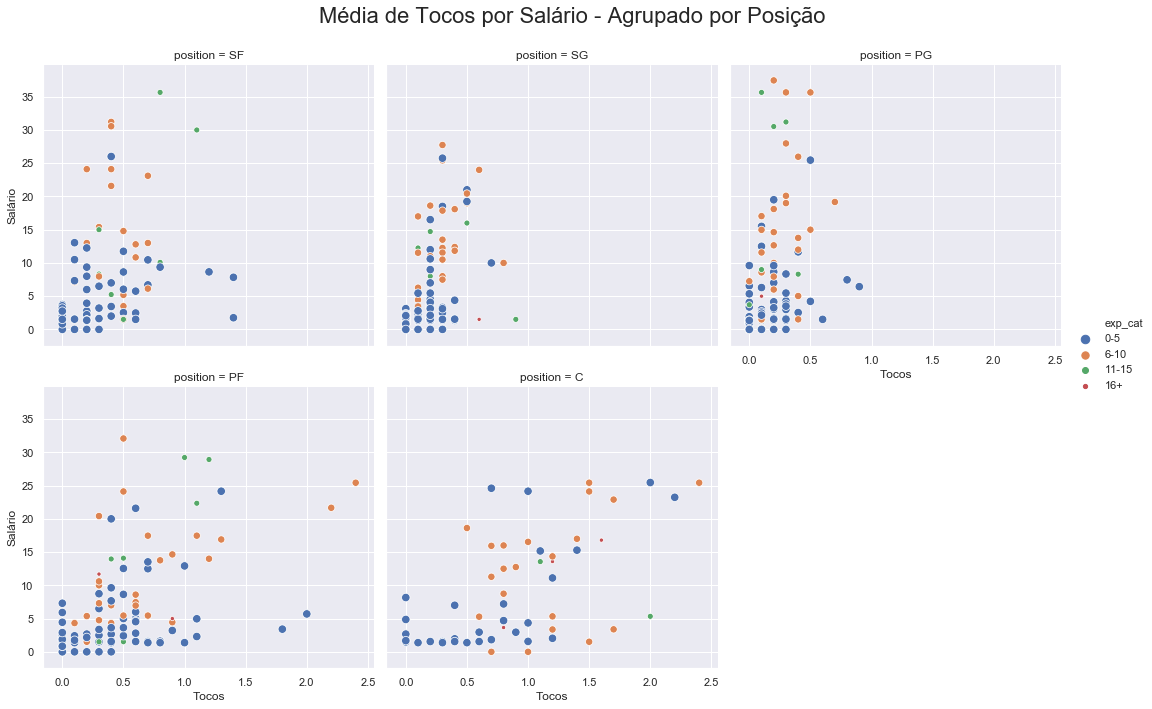

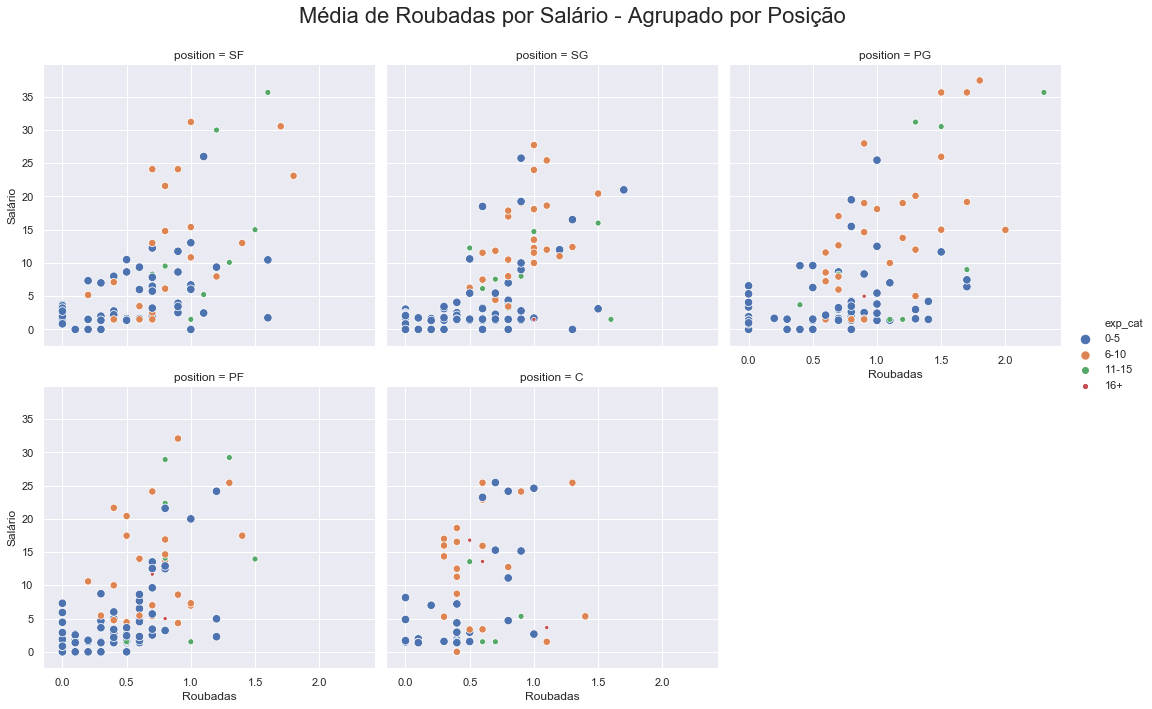

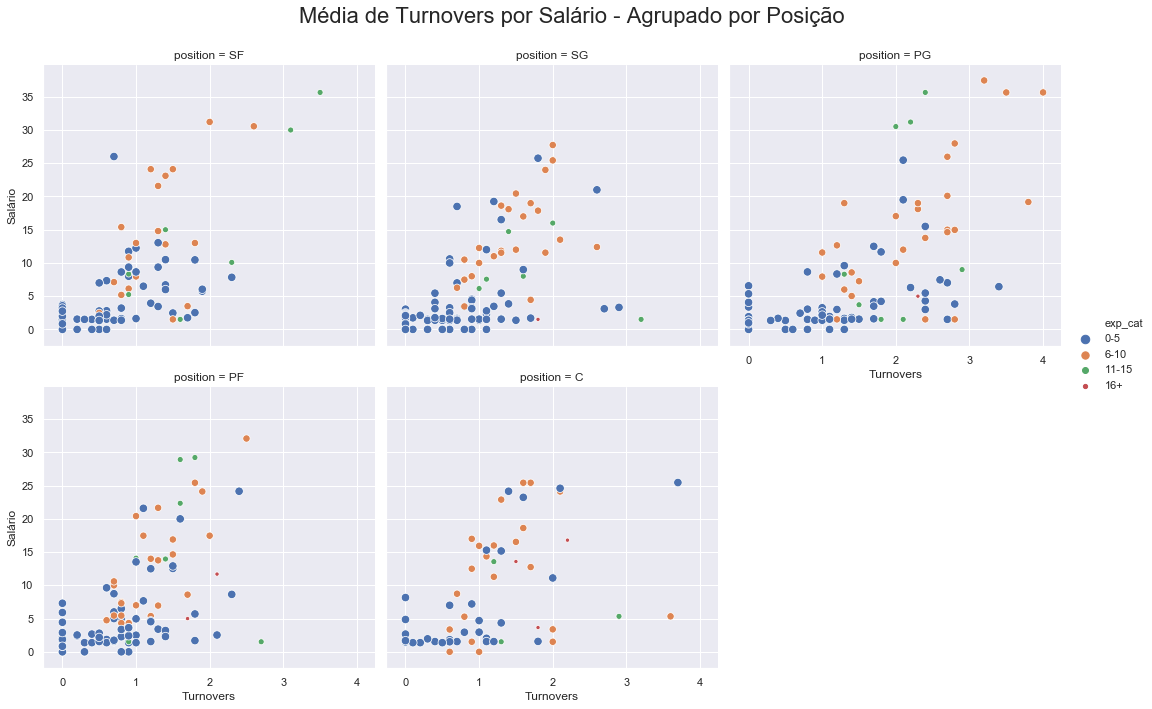

In [27]:
kinds = ['mpg', 'salary']
kinds_name = ['Minuto', 'Salário']

attrs = ['ppg', 'apg', 'blkpg', 'stlpg', 'topg']
attrs_name = ['Pontos', 'Assistências', 'Tocos', 'Roubadas', 'Turnovers']

for kind, kName in zip(kinds, kinds_name):
    for attr, aName in zip(attrs, attrs_name):
        stats_grouped_by_position_chart(nba, attr, aName, kind, kName)

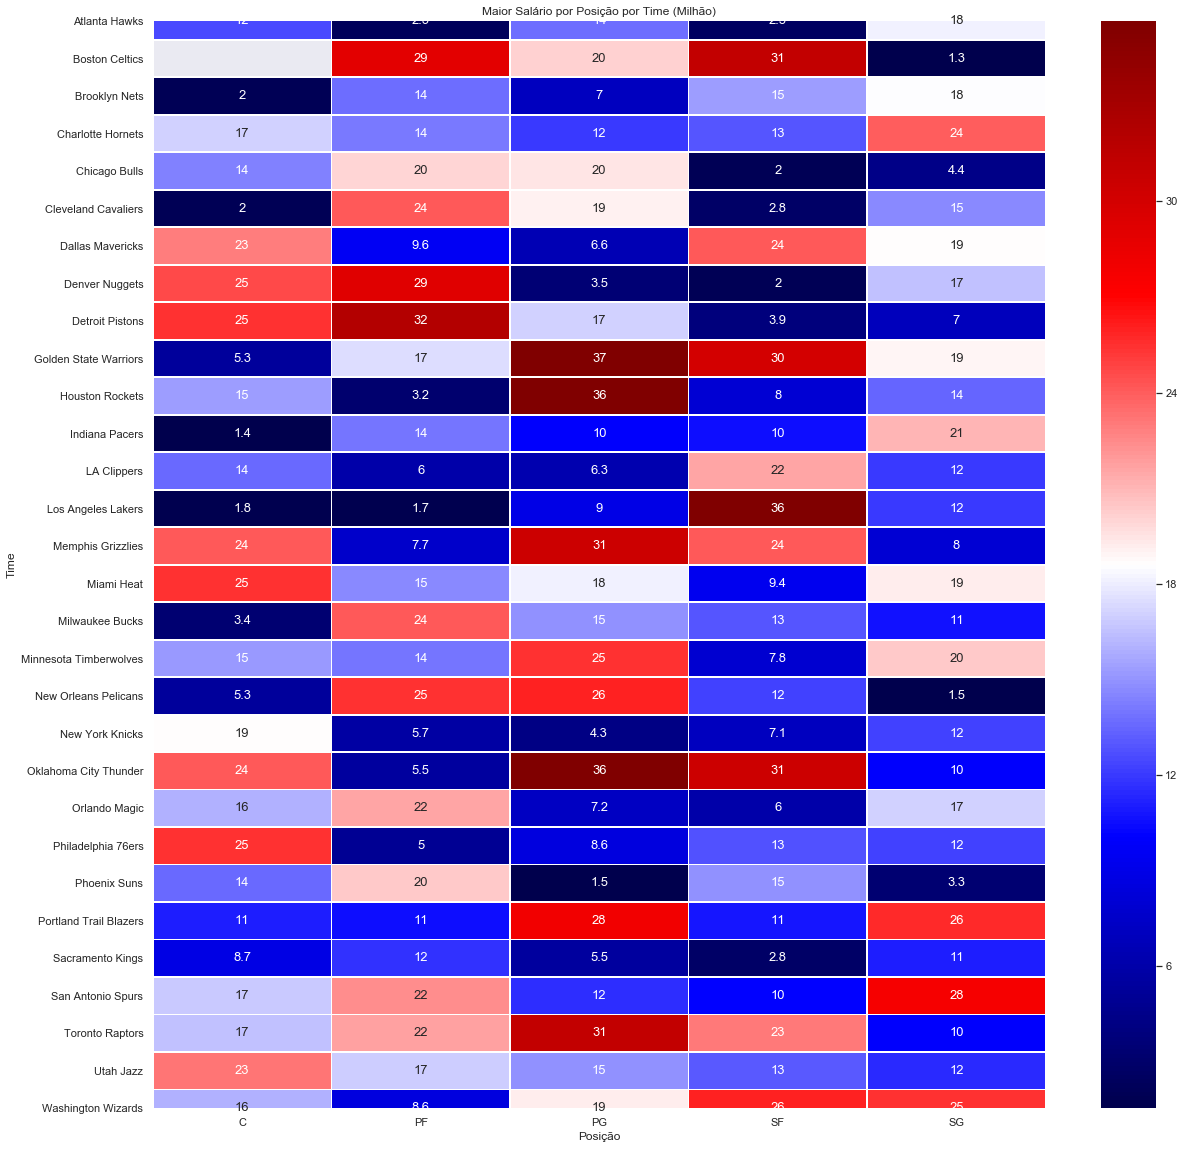

In [28]:
highest_salary_per_position_by_team_heatmap(nba)

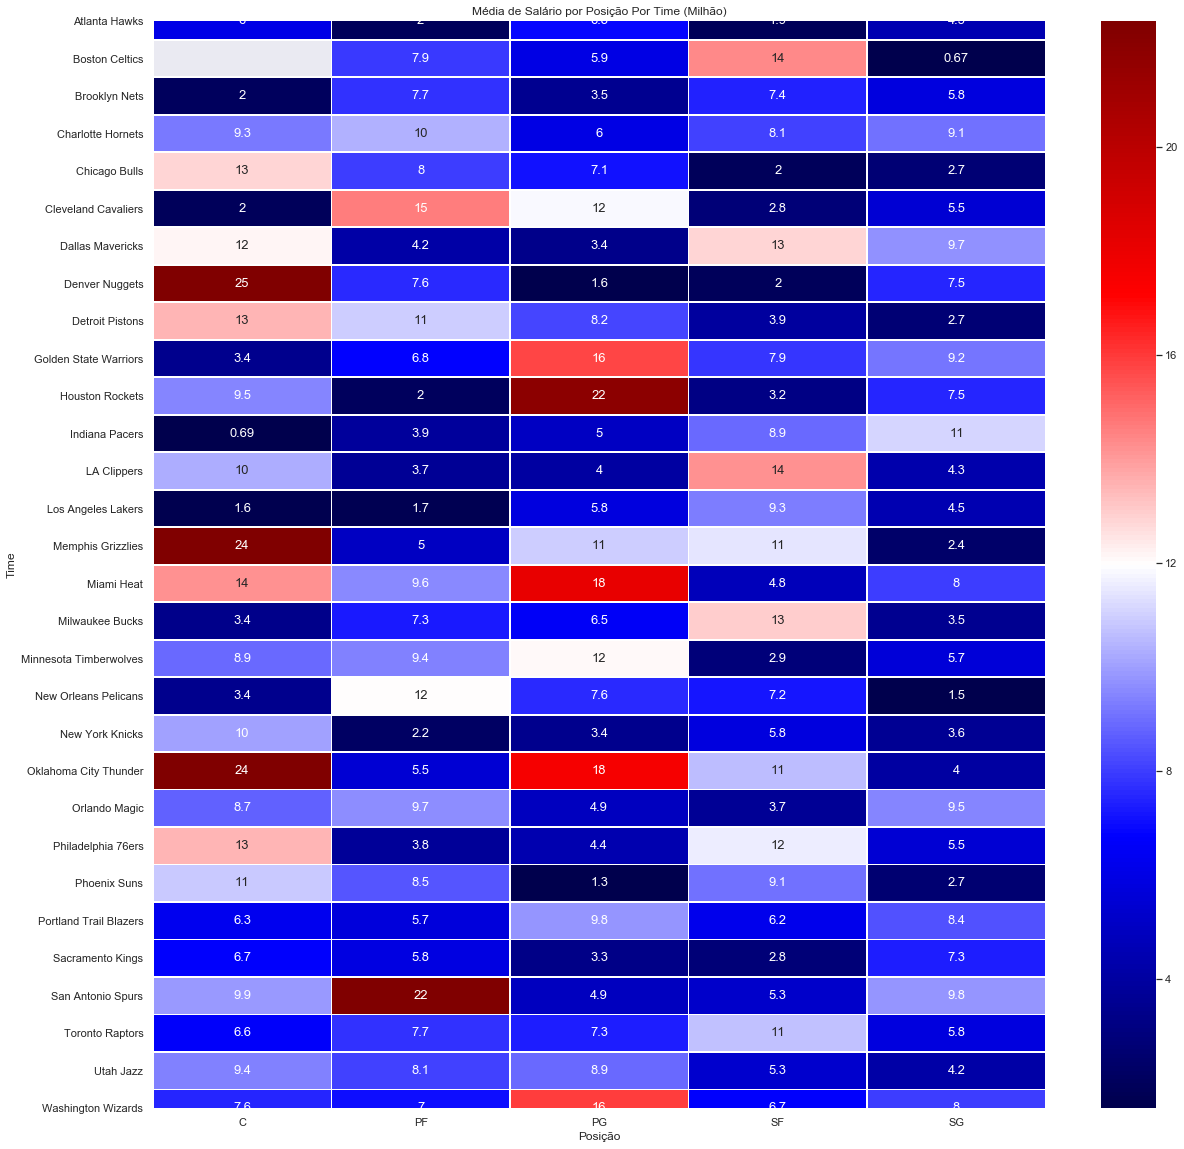

In [29]:
mean_salary_per_position_by_team_heatmap(nba)

In [30]:
top20_salaries(nba)

,team,name,salary,position,age,mpg,ppg,apg,stlpg,topg
103,Golden State Warriors,Stephen Curry,37.457154,PG,30,34.4,23.1,6.8,1.8,3.2
510,Oklahoma City Thunder,Russell Westbrook,35.654150,PG,29,34.4,23.0,8.2,1.7,4.0
147,Los Angeles Lakers,LeBron James,35.654150,SF,33,38.8,27.2,7.2,1.6,3.5
310,Houston Rockets,Chris Paul,35.654150,PG,33,35.3,18.7,9.8,2.3,2.4
306,Houston Rockets,James Harden,35.650150,PG,29,33.8,23.0,6.1,1.5,3.5
230,Detroit Pistons,Blake Griffin,32.088932,PF,29,35.0,21.5,4.3,0.9,2.5
6,Boston Celtics,Gordon Hayward,31.214295,SF,28,31.3,15.6,3.4,1.0,2.0
89,Toronto Raptors,Kyle Lowry,31.200000,PG,32,31.1,14.4,5.9,1.3,2.2
502,Oklahoma City Thunder,Paul George,30.560700,SF,28,33.4,18.6,3.2,1.7,2.6
320,Memphis Grizzlies,Mike Conley,30.521115,PG,31,32.5,14.3,5.7,1.5,2.0


## Analisar correlação

Vamos analisar os valores de cada feature. Se em alguma feature possui valores estranhos.

In [31]:
corr_matrix = nba.corr()

corr_matrix['salary'].sort_values(ascending=False)

salary             1.000000
ppg_last_season    0.671378
ppg                0.657985
ppg_career         0.657985
mpg                0.607698
topg               0.575782
stlpg              0.552072
apg_last_season    0.539316
gp                 0.527409
apg_career         0.519632
experience         0.486838
apg                0.481251
blkpg              0.378015
rgp_career         0.372038
rpg_last_season    0.368273
age                0.357326
per_last_season    0.351810
ftp                0.290302
fgp                0.264267
thp                0.237894
wt                 0.158201
ht                 0.070537
Name: salary, dtype: float64

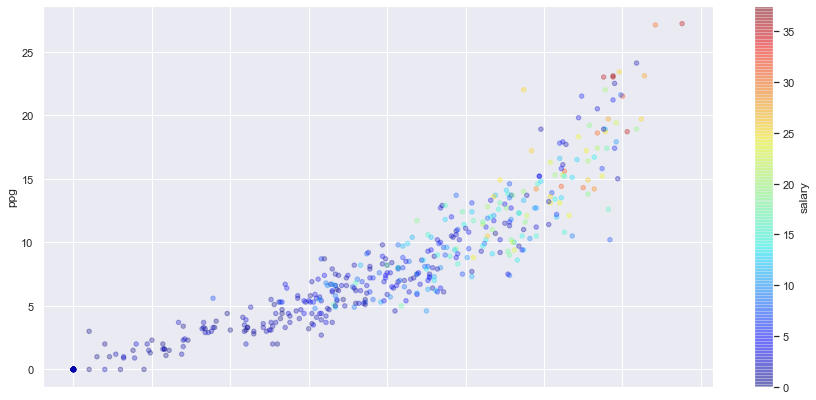

In [32]:
nba.plot(kind='scatter', figsize=(15, 7),
         x='mpg', y='ppg', 
         c='salary', cmap=plt.get_cmap('jet'), 
         colorbar=True, alpha=0.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e657750>,
      dtype=object)

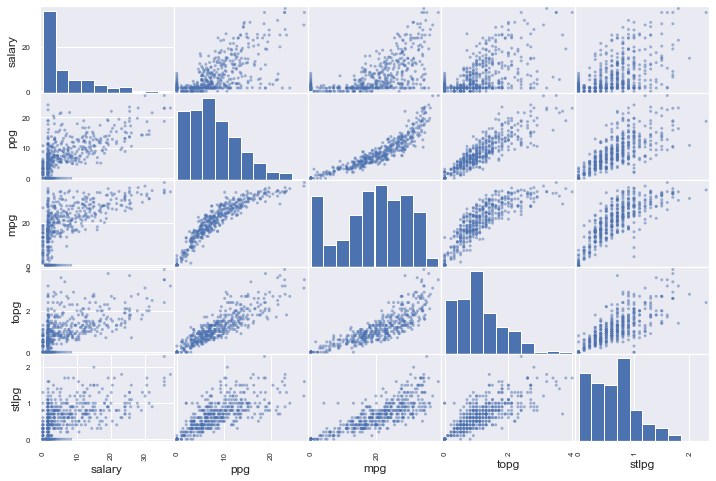

In [33]:
from pandas.plotting import scatter_matrix

attrs = ['salary', 'ppg', 'mpg', 'topg', 'stlpg']
scatter_matrix(nba[attrs], figsize=(12, 8))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


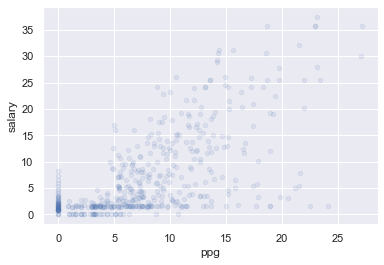

In [34]:
nba.plot(kind='scatter', x='ppg', y='salary', alpha=0.1)

# Preparar dados para o algoritmo de ML

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(nba, nba['exp_cat']):
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#reindexing
    strat_train_set = nba.loc[nba.index.intersection(train_index)]
    strat_test_set = nba.loc[nba.index.intersection(test_index)]
    
print(f'Tamanho do conjunto de treino: {strat_train_set.shape[0]}')
print(f'Tamanho do conjunto de teste: {strat_test_set.shape[0]}')

print('')

print(strat_test_set['exp_cat'].value_counts() / len(strat_test_set))

# Removendo a categoria extra para ser possível stratificar nosso dataset
for set_ in (strat_train_set, strat_test_set):
    set_.drop('exp_cat', axis=1, inplace=True)

Tamanho do conjunto de treino: 323
Tamanho do conjunto de teste: 83

0-5      0.626506
6-10     0.265060
11-15    0.084337
16+      0.024096
Name: exp_cat, dtype: float64


Vamos separar os conjuntos de treino e testes em strats

## Limpar dados

In [36]:
# Vamos pegar os dados novamente sem nenhuma alteração
nba = strat_train_set.drop('salary', axis=1)
nba_labels = strat_train_set['salary'].copy()

# Separar em dataframes com categorias númericas e categóricas
# Removendo colunas não numéricas
# Queremos somente as colunas numéricas
nba_num = nba.drop(['team', 'name', 'url', 'position', 'college', 'fgm_fga', 'thm_tha', 'ftm_fta'], axis=1)

# colunas categóricas que serão usadas
nba_cat = nba[['team', 'position']]

In [37]:
from sklearn.impute import SimpleImputer

# Vai adicionar 0 nos campos que vazios
fill_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Vai substituir o valor zero pela mediana
median_imputer = SimpleImputer(strategy='median', missing_values=0)

X = fill_imputer.fit_transform(nba_num)
X = median_imputer.fit_transform(X)

nba_tr = pd.DataFrame(X, columns=nba_num.columns, index=nba_num.index)
nba_tr.head(5)

,experience,age,ht,wt,ppg_last_season,apg_last_season,rpg_last_season,per_last_season,ppg_career,apg_career,rgp_career,gp,mpg,fgp,thp,ftp,apg,blkpg,stlpg,topg,ppg
0,6.0,31.0,208.28,117.65,6.0,1.1,5.4,12.09,5.4,0.7,4.4,376.0,15.0,0.502,0.143,0.802,0.7,0.5,0.2,0.8,5.4
4,1.0,21.0,198.12,92.76,1.0,3.0,0.5,-4.82,1.0,3.0,0.5,2.0,1.5,0.500,0.342,0.756,1.4,0.3,0.7,0.5,1.0
5,2.0,24.0,195.58,102.26,1.4,0.2,0.4,6.88,1.6,0.2,0.5,47.0,5.8,0.418,0.294,0.710,0.2,0.3,0.1,0.1,1.6
6,8.0,28.0,203.20,101.81,2.0,3.0,1.0,7.43,15.6,3.4,4.2,517.0,31.3,0.444,0.368,0.820,3.4,0.4,1.0,2.0,15.6
7,11.0,32.0,208.28,110.86,12.9,7.4,1.1,17.63,14.2,8.6,1.2,718.0,33.2,0.525,0.370,0.750,3.2,1.2,0.8,1.6,14.2


## Cuidando dos campos de texto/categorias

In [38]:
# vamos converter categorias de texto para números
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
nba_cat_encoded = cat_encoder.fit_transform(nba_cat)

In [39]:
cat_encoder.categories_

[array(['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets',
        'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
        'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
        'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
        'LA Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
        'Miami Heat', 'Milwaukee Bucks', 'New Orleans Pelicans',
        'New York Knicks', 'Orlando Magic', 'Philadelphia 76ers',
        'Phoenix Suns', 'Sacramento Kings', 'San Antonio Spurs',
        'Toronto Raptors', 'Washington Wizards'], dtype=object),
 array(['C', 'PF', 'PG', 'SF', 'SG'], dtype=object)]

Vamos criar um pipeline para facilitar os passos necessários que precisam ser executados

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attrs = list(nba_num)
cat_attrs = list(nba_cat)

# pipeline dos atributos numericos
num_pipeline = Pipeline([
    ('fill_imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('median_imputer', SimpleImputer(strategy='median', missing_values=0)),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cat_encoder', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_attrs),
    ('cat_pipeline', cat_pipeline, cat_attrs)
])

nba_prepared = full_pipeline.fit_transform(nba)

In [41]:
from sklearn.metrics import mean_squared_error

data_test = nba.iloc[:5]
data_test_labels = nba_labels[:5]

data_test_prepared = full_pipeline.transform(data_test)

In [42]:
# EXEMPLO DE UNDERFITTING?
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(nba_prepared, nba_labels)

nba_predictions = lin_reg.predict(data_test_prepared)

print(f'Predictions: {nba_predictions}')
print(f'Labels: {list(data_test_labels)}')

lin_mse = mean_squared_error(data_test_labels, nba_predictions)
lin_rsme = np.sqrt(lin_mse)

print(f'RSME: {lin_rsme}')

Predictions: [ 4.56359863  0.28820801 -0.18530273 14.26464844 18.78198242]
Labels: [5.1936, 0.0, 0.0, 31.214295, 28.928709]
RSME: 8.84037195514633


In [43]:
# EXEMPLO DE OVERFITTING?
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(nba_prepared, nba_labels)

nba_predictions_2 = tree_reg.predict(data_test_prepared)

print(f'Predictions: {nba_predictions_2}')
print(f'Labels: {list(data_test_labels)}')

tree_mse = mean_squared_error(data_test_labels, nba_predictions_2)
tree_rsme = np.sqrt(tree_mse)

print(f'RSME: {tree_rsme}')

Predictions: [ 5.1936    0.        0.       31.214295 28.928709]
Labels: [5.1936, 0.0, 0.0, 31.214295, 28.928709]
RSME: 0.0


Árvore de decisão fica overfitted

In [44]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(nba_prepared, nba_labels)

nba_predictions_3 = forest_reg.predict(data_test_prepared)

print(f'Predictions: {nba_predictions_3}')
print(f'Labels: {list(data_test_labels)}')

forest_mse = mean_squared_error(data_test_labels, nba_predictions_3)
forest_rmse = np.sqrt(forest_mse)

print(f'RSME: {forest_rmse}')

Predictions: [ 5.0080456  0.1378242  0.9532473 22.7911576 26.7030162]
Labels: [5.1936, 0.0, 0.0, 31.214295, 28.928709]
RSME: 3.9208432373578246


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Usando cross-validation

A ideia é analisar qual o modelo apresenta melhor expectativa para ser utilizado como nosso modelo final.

In [45]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard Deviation: {scores.std()}')

In [46]:
from sklearn.model_selection import cross_val_score

# Cross Validation usando a árvore de decisão
tree_scores = cross_val_score(tree_reg,
                         nba_prepared, nba_labels,
                         scoring='neg_mean_squared_error',
                         cv=10)

tree_rmse_scores = np.sqrt(-tree_scores)

print('Árvore de decisão:')
display_scores(tree_rmse_scores)
print('-' * 70 + '\n')

# Cross Validation usando regressão linear
lin_reg_scores = cross_val_score(lin_reg,
                                  nba_prepared, nba_labels,
                                  scoring='neg_mean_squared_error',
                                  cv=10)

lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
print('Regressão linear:')
display_scores(lin_reg_rmse_scores)
print('-' * 70 + '\n')

# Cross Validation usando a floresta aleatórias
forest_scores = cross_val_score(forest_reg,
                                nba_prepared, nba_labels,
                                scoring='neg_mean_squared_error',
                                cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
print('Florestas Aleatórias:')
display_scores(forest_rmse_scores)
print('-' * 70 + '\n')

Árvore de decisão:
Scores: [3.76195357 7.35446071 5.21859174 3.94063658 6.22545968 6.42925804
 9.26599327 6.27341225 6.94295477 6.32832545]
Mean: 6.174104605033514
Standard Deviation: 1.5285741805236257
----------------------------------------------------------------------

Regressão linear:
Scores: [5.56125769e+11 5.13004777e+11 1.00732539e+11 1.04232410e+12
 5.89073236e+00 1.42493961e+12 1.05446980e+12 4.14619824e+10
 7.98213196e+11 3.12927039e+12]
Mean: 866054215875.0836
Standard Deviation: 879891658905.8341
----------------------------------------------------------------------

Florestas Aleatórias:
Scores: [5.08842865 5.53557337 3.86092537 4.16937715 4.97855578 4.86210931
 6.33464949 4.56059492 5.05683511 5.91545991]
Mean: 5.036250904995515
Standard Deviation: 0.714428399411666
----------------------------------------------------------------------



## Sintonia fina do modelo

### GridSearch

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params_grid = [
    { 'n_estimators': [3, 10, 30], 'max_features': [4, 5, 6, 7, 8]},
    { 'n_estimators': [3, 5, 10], 'max_features': [4, 5, 6], 'bootstrap': [False]}
]

forest_reg = RandomForestRegressor()

# Round 1 - 5 * 3 = 15
# Round 2 - 3 * 3 = 9
# Total = 24 * 5(quantidade de cv) = 120 combinações
grid_search = GridSearchCV(forest_reg, params_grid, cv=10)

grid_search.fit(nba_prepared, nba_labels)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [4, 5, 6, 7, 

## Testando Árvores Aleatórias
### Usando os parâmetros encontrados pelo GridSearch

In [48]:
data_test = nba.iloc[:5]
data_test_labels = nba_labels[:5]

data_test_prepared = full_pipeline.transform(data_test)

final_model = grid_search.best_estimator_
nba_predictions_f = final_model.predict(data_test_prepared)

print(f'Predictions: {nba_predictions_f}')
print(f'Labels: {list(data_test_labels)}')

final_model_mse = mean_squared_error(data_test_labels, nba_predictions_f)
final_model_rmse = np.sqrt(final_model_mse)

print(f'RSME: {final_model_rmse}')

Predictions: [ 5.70943057  0.37251447  0.4917212  25.90287397 23.3437768 ]
Labels: [5.1936, 0.0, 0.0, 31.214295, 28.928709]
RSME: 3.4655244628149875


### RandomizedSearch

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=10)
}

forest_reg = RandomForestRegressor()

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=15, cv=10, scoring='neg_mean_squared_error',
                                random_state=42)

rnd_search.fit(nba_prepared, nba_labels)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st...


## Testando Árvores Aleatórias
### Usando os parâmetros encontrados pelo RandomizedSearch

In [50]:
data_test = nba.iloc[:5]
data_test_label = nba_labels.iloc[:5]

data_test_prepared = full_pipeline.transform(data_test)

final_model = rnd_search.best_estimator_
final_model.fit(nba_prepared, nba_labels)
nba_predcitions_f_2 = final_model.predict(data_test_prepared)

print(f'Predictions: {nba_predcitions_f_2}')
print(f'Labels: {list(data_test_labels)}')

final_model_mse = mean_squared_error(data_test_labels, nba_predcitions_f_2)
final_model_rmse = np.sqrt(final_model_mse)

print(f'RSME: {final_model_rmse}')

Predictions: [ 5.80174556  0.42564476  0.37193422 23.63592586 24.49890542]
Labels: [5.1936, 0.0, 0.0, 31.214295, 28.928709]
RSME: 3.9432014419574575


In [51]:
# Importância das funcionalidades
features_importances = grid_search.best_estimator_.feature_importances_

cat_encoder = full_pipeline.named_transformers_['cat_pipeline'].named_steps['cat_encoder']
cat_encoder_categories = cat_encoder.categories_
cat_enconder_attrs = list(cat_encoder_categories[0]) + list(cat_encoder_categories[1])

attrs = list(num_attrs) + cat_enconder_attrs

for importance, attr in sorted(zip(features_importances, attrs), reverse=True):
    print(f'{attr} - {importance * 100: .2f}%')

gp -  9.59%
ppg_career -  7.97%
mpg -  7.73%
ppg -  6.87%
ppg_last_season -  6.70%
per_last_season -  6.28%
topg -  5.19%
apg_career -  4.96%
apg_last_season -  4.94%
stlpg -  4.44%
experience -  4.37%
age -  4.33%
apg -  3.55%
blkpg -  3.20%
thp -  3.09%
rpg_last_season -  2.24%
rgp_career -  2.20%
fgp -  2.16%
wt -  1.81%
ftp -  1.78%
ht -  1.49%
SF -  0.44%
PG -  0.38%
C -  0.38%
Washington Wizards -  0.36%
SG -  0.34%
Boston Celtics -  0.34%
Denver Nuggets -  0.27%
Toronto Raptors -  0.22%
PF -  0.21%
Dallas Mavericks -  0.20%
Phoenix Suns -  0.17%
Atlanta Hawks -  0.17%
Memphis Grizzlies -  0.17%
New Orleans Pelicans -  0.14%
New York Knicks -  0.13%
Houston Rockets -  0.12%
Detroit Pistons -  0.12%
Charlotte Hornets -  0.11%
Los Angeles Lakers -  0.10%
Sacramento Kings -  0.09%
LA Clippers -  0.09%
Miami Heat -  0.09%
Orlando Magic -  0.08%
Indiana Pacers -  0.07%
Chicago Bulls -  0.07%
Milwaukee Bucks -  0.06%
San Antonio Spurs -  0.06%
Brooklyn Nets -  0.05%
Golden State Warrio

Podemos notar que a posição do jogador e/ou o time que ele joga tem muita pouca importância para determinar seu salário.

Como a resposta para o trabalho é se o salário da temporada é justo, eu não vou considerar as estatísticas da temporada passada e nem sua média durante a carreira.

Depois será feito um teste sem os jogadores que receberam algum salário, mas não fizeram nenhum ponto, assistência e etc. Pode ser um jogador que recebeu o salário, se machucou e ficou fora da temporada, como pode ser dados inexatos.

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attrs = ['experience', 'age', 'gp', 'fgp', 'thp', 'ftp', 'apg', 'blkpg', 'stlpg', 'topg', 'ppg']

def get_num_column_pipeline():    
    # pipeline dos atributos numericos
    num_pipeline = Pipeline([
        ('fill_imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('median_imputer', SimpleImputer(strategy='median', missing_values=0)),
        ('std_scaler', StandardScaler())
    ])

    full_pipeline = ColumnTransformer([
        ('num_pipeline', num_pipeline, num_attrs)
    ])

    return full_pipeline

### RandomizedSearch

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

nba_prepared = get_num_column_pipeline().fit_transform(nba)

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=10)
}

forest_reg = RandomForestRegressor()

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=15, cv=10, scoring='neg_mean_squared_error',
                                random_state=42)

rnd_search.fit(nba_prepared, nba_labels)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st...


## Testando Árvores Aleatórias
### Utilzando o melhor modelo encontrado pelo RandomizedSearch

In [54]:
def test_data_test():
    print(f'NBA Shape: {nba.shape}')
    full_pipeline = get_num_column_pipeline()
    nba_prepared = full_pipeline.fit_transform(nba)

    data_test = nba.iloc[:5]
    data_test_labels = nba_labels.iloc[:5]

    data_test_prepared = full_pipeline.transform(data_test)

    final_model = rnd_search.best_estimator_
    final_model.fit(nba_prepared, nba_labels)

    nba_predictions = final_model.predict(data_test_prepared)

    print(f'Predictions: {nba_predictions}')
    print(f'Labels: {list(data_test_labels)}')

    final_model_mse = mean_squared_error(data_test_labels, nba_predictions)
    final_model_rmse = np.sqrt(final_model_mse)

    print(f'RSME: {final_model_rmse}')

# Testando antes de remover os jogadores que não contribuíram
test_data_test()

NBA Shape: (323, 29)
Predictions: [ 5.87821732  0.60955546  0.36394031 25.43025421 26.10829233]
Labels: [5.1936, 0.0, 0.0, 31.214295, 28.928709]
RSME: 2.911446009635699


Melhorou o nosso erro, mas ainda vamos testar removendo os jogadores que não tiveram nenhum estatística durante o ano (gp/ppg/apg).

In [55]:
# Filtro para remover
drop_index = nba[
    (nba['ppg'] == 0) 
    & (nba['gp'] == 0) 
    & (nba['apg'] == 0)
].index

# Removendo os jogadores
nba.drop(drop_index, axis=0, inplace=True)

# Removendo os salários
nba_labels.drop(drop_index, axis=0, inplace=True)

# Testando novamente
test_data_test()

NBA Shape: (291, 29)
Predictions: [ 6.07664879  0.52948863  0.45770707 25.58432512 25.20742229]
Labels: [5.1936, 0.0, 0.0, 31.214295, 28.928709]
RSME: 3.059874664669123


Remover 79 jogadores que não possui estatísticas não melhorou tanto o nosso modelo. Tem momentos que o erro é menor e outras que são maiores.

## Teste final

Vamos utilizar o conjunto de teste para avaliar

In [56]:
final_model = rnd_search.best_estimator_

# Um jogador estrela
curry_idx = nba_bkp[nba_bkp['name'] == 'Stephen Curry'].index
curry = nba_bkp.loc[curry_idx]
curry_feature = curry.drop('salary', axis=1)
curry_label = curry['salary'].copy().iloc[0]

# Um jogador sem ser estrela
abaynes = nba_bkp.loc[[0]]
abaynes_feature = abaynes.drop('salary', axis=1)
abaynes_label = abaynes['salary'].copy().iloc[0]

X_test = strat_test_set.drop('salary', axis=1)
y_test = strat_test_set['salary'].copy()

pipeline = get_num_column_pipeline()
pipeline.fit(nba)

X_test_prepared = pipeline.transform(X_test)

predicted = final_model.predict(X_test_prepared)

final_model_mse = mean_squared_error(y_test, predicted)
final_model_rmse = np.sqrt(final_model_mse)

print(f'RMSE do modelo final: {final_model_rmse: .2f}M\n')

pipeline.fit(nba)
tst_features_prepared = pipeline.transform(pd.concat([curry_feature, abaynes_feature]))

tst_predicted = final_model.predict(tst_features_prepared)

curry_predicted = tst_predicted[0]
abaynes_predicted = tst_predicted[1]

print(f'Salário do Stephen Curry deveria ser: {curry_predicted:.1f}M\n')
print(f'Salário do Stephen Curry é: {curry_label:.1f}M\n')
print(f'Diferença: {curry_label - curry_predicted: .1f}M\n')
print(f'Erro de {(100 - (curry_predicted * 100) / curry_label): .1f}%')

print('')
print('*' * 40)
print('')

print(f'Salário do Aron Baynes deveria ser: {abaynes_predicted:.1f}M\n')
print(f'Salário do Aron Baynes é: {abaynes_label:.1f}M\n')
print(f'Diferença: {abaynes_label - abaynes_predicted: .1f}M\n')
print(f'Erro de {(100 - (abaynes_predicted * 100) / abaynes_label): .1f}%')

RMSE do modelo final:  5.79M

Salário do Stephen Curry deveria ser: 35.2M

Salário do Stephen Curry é: 37.5M

Diferença:  2.3M

Erro de  6.1%

****************************************

Salário do Aron Baynes deveria ser: 6.1M

Salário do Aron Baynes é: 5.2M

Diferença: -0.9M

Erro de -17.0%


Utilizei, por curiosidade, um jogador sem ser uma grande estrela da NBA para saber se como o algoritmo se sairia.

# Conclusão

É sabido que vários fatores externos determinam o salário de um jogador, principalmente se ele for uma estrela. Um jogador de grande repercussão traz patrocinadores, mais telespectadores, maior público, vende mais camisas e entre outros...

Isso pode fazer com que um algoritmo de aprendizado de máquina, que só analisa seu desempenho em quadra não consiga prever se seu salário é compatível ou não.

O algoritmo utilizado nesse trabalho chegou bem perto do salário recebido pelo Stephen Curry. Eu diria que seu salário é justo, levando em consideração apenas suas estatística dentro de quadra.